# Deep Learning Tutorial - Version 1

아직 안 배운 개념들도 일부 나옵니다. 

7~8주차에 배운 뒤 적용하면 되며 그 이전에는 default 값으로 설정해도 무방하니 충분히 할 수 있습니다.

-------

## 1. data 업로드

1) MNIST란?  손으로 쓴 글자 데이터셋에서 숫자만 따로 뽑아낸 데이터셋입니다. 

2) 0부터 255 사이의 값을 가지는 흑백이미지, 28*28사이즈, 7만개의 이미지(train=6만,test=1만)로 구성되어있습니다.

3) 프로젝트 하실 때 data 업로드 방식은 이와 다릅니다. (향후 kaggle을 설명하면서 말씀 드리겠습니다.)

4) tensorflow 내의 함수로 data를 한 번에 불러올 수 있는 함수가 있습니다.

keras 공식문서: https://keras.io/datasets/#mnist-database-of-handwritten-digits 

tensorflow 공식문서: https://www.tensorflow.org/api_docs/python/tf/keras/datasets

In [1]:
from tensorflow.keras.datasets import mnist

그냥 소문자로 하겠습니다.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

-------

## 2. data 확인

1) 데이터를 소개하기 위해 필요한 과정입니다.

2) 데이터가 잘 업로드 되었는지 확인하기 위해 필요한 과정입니다.

3


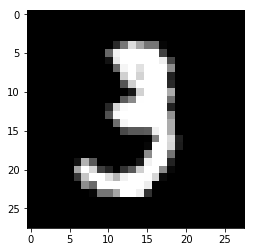

In [4]:
import matplotlib.pyplot as plt # 그래프 그리는 라이브러리로 코세라 과제에서 많이 보셨을 겁니다.
%matplotlib inline 
# 이 부분이 있어야 셀 안에 그림을 그릴 수 있습니다.

index = 10 # index 설정에 따라 원하는 data를 골라서 그릴 수 있습니다.
img = x_train[index]
print(y_train[index])
plt.imshow(img,cmap='gray')

-------

## 3. data preprocessing

#### <font color="blue"> data를 딥러닝 모델 안에 넣고 잘 train 될 수 있게 하는 모든 행위를 의미합니다.

1) tensorflow는 기본적으로 'float32'를 사용해서 혹시 모를 error를 방지해 astype을 사용해서 형변환한다.

2) 이전에 잠시 언급된 normalization 또한 data pre-processing 과정에 속합니다.(test set까지 normalization 한다.) (7주차에 자세히 다룹니다.)

3) flatten: Dense layer는 vector (1D-array)만 input으로 받을 수 있어서 3D-array를 flatten하는 과정

(엄밀하게 얘기하면 (sample 개수, 세로 픽셀 수, 가로 픽셀 수[, channel 수] ) -> (sample 개수, feature 개수) 로의 변화)

(mnist data는 grayscale data(흑백 data)여서 channel이 생략되어 있습니다.)

4) one-hot encoding

In [5]:
## 1) 형변환 (astype)

x_train = x_train.astype('float32') # 32비트 실수형 / np.ndarray.astype은 numpy에 검색하면 형 변환 해주는 함수
x_test = x_test.astype('float32')

np.ndarray.astype: https://numpy.org/devdocs/reference/generated/numpy.ndarray.astype.html?highlight=astype#numpy.ndarray.astype

In [7]:
x_train.dtype

dtype('float32')

In [8]:
## 2) normalize

x_train /= 255
x_test /= 255

In [9]:
# cf> flatten 전

x_train.shape

(60000, 28, 28)

In [10]:
## 3) flatten

x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

In [11]:
# cf> flatten 후

x_train.shape

(60000, 784)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
## 4) one-hot encoding


'''from tensorflow.keras.utils import to_categorical

to_categorical(y_train, 10) # convert class vector to binary class matirx
to_categorical(y_test, 10)

'''


아직은 사용하지 않을 것입니다. 사용했을 때와 안 했을 때의 차이를 알아야 하기 때문입니다.

---------

## 4. 모델 만들기

### 1) tensorflow.keras.models.Sequential로 만든다.

1> 첫 번째 layer는 input_dim(feature 개수)을 설정해야 한다.

2> 마지막 layer는 우리가 진행하는 일이 regression, binary, multiclass이냐에 따라 다르게 설정한다.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
# from tensorflow.keras import layers
# from tensorflow.keras import optimizers

In [14]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu')) # input_dim 대신에 input_shape 사용 가능
model.add(Dense(17, 'relu'))
model.add(Dense(units=10, activation='softmax')) # 마지막 layer는 multiclass이니 activation을 softmax

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 17)                1105      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                180       
Total params: 51,525
Trainable params: 51,525
Non-trainable params: 0
_________________________________________________________________


------

In [16]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])

---------

## 6. 모델 학습

### 1) fit 메서드를 이용

#### <font color="blue"> <shift + tab> 
    
공식문서: https://keras.io/models/sequential/#fit
    
1> x: feature = input
    
2> y: label
    
3> epochs (7주차) (이전에 잠시 언급: 전체 training data를 train 하는 횟수)
    
4> verbose: train할 때 표시되는 bar (숫자를 추가할수록 기능이 추가되지만 보통 1을 사용
    
5> validation_split
    
* 여기서 data split을 할 수 있다.
    
* x로 들어가는 data 중 validation set에 할당할 비율을 할당한다. (0~1사이의 float)

6> validation_data

* 미리 data를 잘라 두었다면 'validation_data = (x_val, y_val)' 식으로 할당해도 된다.
    
나머지는 크게 중요하지 않습니다. (향후 등장할 개념: batch_size, callbacks)

In [17]:
history = model.fit(x_train, y_train, validation_split=1/6, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 4s 3ms/step - accuracy: 0.9029 - loss: 0.3367 - val_loss: 0.1680 - val_accuracy: 0.9520
Epoch 2/5
1563/1563 [==============================] - 4s 2ms/step - accuracy: 0.9533 - loss: 0.1567 - val_loss: 0.1316 - val_accuracy: 0.9622
Epoch 3/5
1563/1563 [==============================] - 4s 2ms/step - accuracy: 0.9650 - loss: 0.1182 - val_loss: 0.1190 - val_accuracy: 0.9657
Epoch 4/5
1563/1563 [==============================] - 4s 2ms/step - accuracy: 0.9716 - loss: 0.0942 - val_loss: 0.1204 - val_accuracy: 0.9665
Epoch 5/5
1563/1563 [==============================] - 4s 3ms/step - accuracy: 0.9756 - loss: 0.0787 - val_loss: 0.1156 - val_accuracy: 0.9660


### 2) history

1> model.fit의 return 값

2> train 과정에서 일어나는 현상들을 기록

In [18]:
history.history['loss']

[0.33667096495628357,
 0.15669727325439453,
 0.11823294311761856,
 0.09421992301940918,
 0.07871531695127487]

In [19]:
vars(history) # vars: python의 내장함수 / 해당 객체의 모듈, 클래스, 인스턴스의 값을 넘긴다.

{'_chief_worker_only': None,
 '_supports_tf_logs': False,
 'epoch': [0, 1, 2, 3, 4],
 'history': {'accuracy': [0.902899980545044,
   0.9532600045204163,
   0.9650400280952454,
   0.9716200232505798,
   0.9755600094795227],
  'loss': [0.33667096495628357,
   0.15669727325439453,
   0.11823294311761856,
   0.09421992301940918,
   0.07871531695127487],
  'val_accuracy': [0.9520000219345093,
   0.9621999859809875,
   0.9656999707221985,
   0.9664999842643738,
   0.9660000205039978],
  'val_loss': [0.16803798079490662,
   0.13162581622600555,
   0.11899234354496002,
   0.12037238478660583,
   0.11560914665460587]},
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x9b9ad1f860>,
 'params': {'epochs': 5, 'steps': 1563, 'verbose': 1},
 'validation_data': None}

-----

cf> vars: python의 내장함수 / 해당 객체의 모듈, 클래스, 인스턴스의 값을 넘긴다.

In [20]:
class FourCal:
    def __init__(self, first, second):
        self.first = first
        self.second = second
    a = 1
    
    def setdata(self, first, second):
        self.first = first
        self.second = second
    def add(self):
        result = self.first + self.second
        return result
    def mul(self):
        result = self.first * self.second
        return result
    def sub(self):
        result = self.first - self.second
        return result
    def div(self):
        result = self.first / self.second
        return result

In [21]:
vars(FourCal)

mappingproxy({'__dict__': <attribute '__dict__' of 'FourCal' objects>,
              '__doc__': None,
              '__init__': <function __main__.FourCal.__init__(self, first, second)>,
              '__module__': '__main__',
              '__weakref__': <attribute '__weakref__' of 'FourCal' objects>,
              'a': 1,
              'add': <function __main__.FourCal.add(self)>,
              'div': <function __main__.FourCal.div(self)>,
              'mul': <function __main__.FourCal.mul(self)>,
              'setdata': <function __main__.FourCal.setdata(self, first, second)>,
              'sub': <function __main__.FourCal.sub(self)>})

-------

### cf> add 메서드의 단점

#### <font color="green"> 부족한 것 같으니 5번 더 해볼까?

In [ ]:
history = model.fit(x_train, y_train, validation_split=1/6, epochs=5)

#### <font color="green"> 왜 이번에는 처음부터 좋지?
    
fit(epoch 5회)을 연달아서 하면 -> 이미 5회 학습된 상태에서 5회 추가로 학습하는 것이기 때문에 -> 현재 총 epoch이 10인 상황
    
#### <font color="green"> 하지만 다른 epoch으로 처음부터 다시 하고 싶은데
    
1) del model을 하고 다시 코드 위부터 실행 (귀찮다.)
    
2) def 안에 model 만드는 과정을 가둔다. (있다가 version 2에서 한다.)

-----------

## 7. 학습과정 graph

### 1) loss

1> 위에서 학습한 내용을 토대로 train/val 의 loss값을 시각적으로 확인 하는 단계입니다.

2> history.history = {'loss': ... , 'accuracy':... , 'val_loss': ... , 'val_accuracy': ...}이 각각 담겨있다.

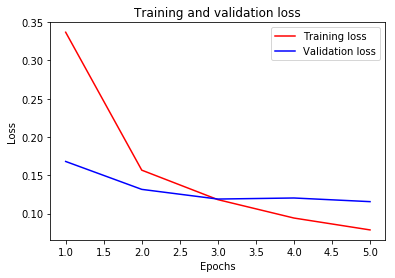

In [23]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()       ## plt.legend - 동시에 여러개의 그래프를 그릴 때, 그래프마다 라벨을 달고 이 라벨명을 출력하는 기능을 합니다.

plt.show()

### 2) accuracy

1> 위에서 학습한 내용을 토대로 train/val 의 accuracy값을 시각적으로 확인 하는 단계입니다.

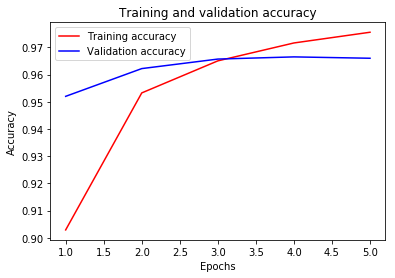

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---------------

## 8. 최종 test

### 1) evaluate 메서드를 이용

0> test set으로 마지막 검증하는 과정

#### <font color="blue"> <shift + tab> 
    
공식문서: https://keras.io/models/sequential/#evaluate

1> x
    
2> y
    
3> verbose

In [25]:
loss_and_metrics = model.evaluate(x_test, y_test, verbose=0) # return 값은 loss와 accuracy를 가지는 리스트

loss_and_metrics

In [26]:
print('\n')
print('test_loss: ' + str(loss_and_metrics[0]))
print('test_accuracy: ' + str(loss_and_metrics[1]*100) + '%')



test_loss: 0.11970636993646622
test_accuracy: 96.60999774932861%
